<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialization" data-toc-modified-id="Initialization-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Initialization</a></span></li><li><span><a href="#Methods" data-toc-modified-id="Methods-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Methods</a></span><ul class="toc-item"><li><span><a href="#Counts" data-toc-modified-id="Counts-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Counts</a></span><ul class="toc-item"><li><span><a href="#Dwarfs" data-toc-modified-id="Dwarfs-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Dwarfs</a></span></li><li><span><a href="#Massive" data-toc-modified-id="Massive-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Massive</a></span></li></ul></li><li><span><a href="#Distributions" data-toc-modified-id="Distributions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Distributions</a></span></li></ul></li></ul></div>

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from utils.paths import SetupPaths
from utils.get_summary_data import compile_summary
from vectorCorrection import vectorCorrection as vector


In [2]:
plt.rcParams.update({'font.size':20})

from rach for plotting with "differences": 
fig, ax = plt.subplots(1, 3, figsize=(14,4), sharey=True, gridspec_kw={'width_ratios': [4, 3, 4],'wspace': 0.05})

# Initialization

In [3]:
palette = {"Illustris":"#668AFF","TNG": "#B6DAFF", # "TNG": "#7B55F3"
           "dark":"#044751","hydro": "#B6DAFF", 
           
           "Illustris dark": "#009292", "Illustris hydro": "#B6DAFF",
           "TNG dark": "#930200", "TNG hydro": "#FFB5DC",
           
           "All Pairs":"#668AFF","Major Pairs": "#7B55F3",
           "Minor Pairs":'#FFB201',"Minor Plus Pairs":"#FF6300",
           
           "Extra":"#DE2280","Stellar":"#0A68DD",
           "Halo":"#4B0094","Max Halo":"#FF6BB7"}
# alphaVal = {"Major":0.7,"Minor":0.4}
# style = {"dark":"dashed","hydro":"solid"}

In [4]:
zs = {"z":[0,1,2,3,4], "zill":[135,85,68,60,54], "ztng":[99,50,33,25,21]}

# Methods


## Counts

Counts of primaries and pairs as a function of time (tertiaries?)

### Dwarfs

In [5]:
data_sum = {}
for sim in ["Illustris","TNG"]:
    data_sum[sim] = {}
    
    for phys in ["dark","hydro"]:
        inst = compile_summary(sim=sim, phys=phys, size="dwarf", subset="allpairs", redshift_cutoff=3.9)
        data_sum[sim][phys] = inst.get_data()
        
        print(f"done with {sim} {phys}")

0 does not exist -- skipping
1 does not exist -- skipping
2 does not exist -- skipping
3 does not exist -- skipping
4 does not exist -- skipping
5 does not exist -- skipping
6 does not exist -- skipping
7 does not exist -- skipping
8 does not exist -- skipping
9 does not exist -- skipping
10 does not exist -- skipping
11 does not exist -- skipping
12 does not exist -- skipping
13 does not exist -- skipping
14 does not exist -- skipping
54 does not exist -- skipping
done with Illustris dark
0 does not exist -- skipping
1 does not exist -- skipping
2 does not exist -- skipping
3 does not exist -- skipping
4 does not exist -- skipping
5 does not exist -- skipping
6 does not exist -- skipping
7 does not exist -- skipping
8 does not exist -- skipping
9 does not exist -- skipping
10 does not exist -- skipping
11 does not exist -- skipping
12 does not exist -- skipping
13 does not exist -- skipping
14 does not exist -- skipping
54 does not exist -- skipping
113 does not exist -- skipping
done

In [8]:
data_sum['Illustris']['dark'].keys()

dict_keys(['Redshift', 'Snapshot', 'Number pairs', 'Number primaries', 'Ratio pairs', 'Median Separation', 'Median Separation Quartiles', 'Mean Separation', 'Mean Separation Std', 'Median RelVel', 'Median RelVel Quartiles', 'Mean RelVel', 'Mean RelVel Std', 'Mean Lowsep Counts', 'Mean Lowsep Counts Std'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


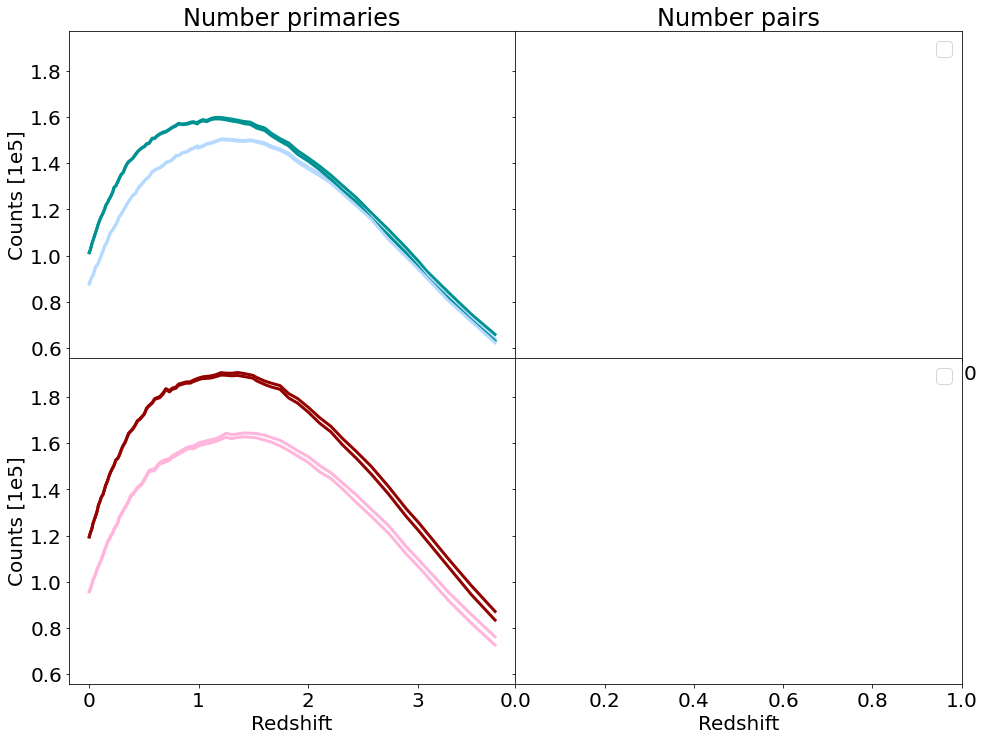

In [30]:
fig,ax = plt.subplots(2,2,figsize=(16,12),sharey=True)
plt.subplots_adjust(wspace=0,hspace=0)

for col,it_key in enumerate(["Number primaries","Number pairs"]):
    for row, it_sim in enumerate(["Illustris","TNG"]):

        for it_phys in ["dark","hydro"]:
            reds = data_sum[it_sim][it_phys]["Redshift"]
            num = data_sum[it_sim][it_phys][it_key]

            ax[row][0].plot(reds, np.array(num)/1e5, color=palette[f"{it_sim} {it_phys}"], label=f"{it_sim} {it_phys}",lw=3)
#         ax[row][col].scatter(seps[mask], vels[mask],color='black',label="Median")

        ax[row][0].set(ylabel="Counts [1e5]")
        ax[row][1].legend()
        ax[1][col].set(xlabel="Redshift")
        ax[0][col].set(title=it_key)



# plt.savefig(f"../plots/pairs_z0_newfields/{size}_{subset}_sepvsvel.pdf",bbox_inches='tight')
plt.show()


In [ ]:

fig,ax = plt.subplots(2,2,figsize=(16,8))

simNames = ["Illustris", "TNG"]
keytoplot = ""
errorkey = "Mean Lowsep Counts Std"
# keylabel = "Ratio of primaries"
linestyles = {"Illustris":"dashed", "TNG":"solid"}
linewidth = {"Illustris":1, "TNG":4}
altsize = 1
altalpha = 0.2

# left top plot (major pairs in Illustris)
# ax.set_title("hi")
for sim in simNames:
    reds_dark = data_summary_lowsep[sim]["dark"]['Redshift']
    reds_hydro = data_summary_lowsep[sim]["hydro"]['Redshift']
    
    norm_dark = np.array(data_summary_lowsep[sim]["dark"][keytoplot])[-1]
    norm_hydro = np.array(data_summary_lowsep[sim]["hydro"][keytoplot])[-1]
    
    plot_dark = np.array(data_summary_lowsep[sim]["dark"][keytoplot])/norm_dark
    plot_hydro = np.array(data_summary_lowsep[sim]["hydro"][keytoplot])/norm_hydro
    
    ax.plot(reds_dark, plot_dark,   label=f'{sim} dark',  color="#EE220C",  linestyle=linestyles[sim], lw=linewidth[sim])
    ax.plot(reds_hydro, plot_hydro, label=f'{sim} hydro', color="orange", linestyle=linestyles[sim], lw=linewidth[sim])

    
    if sim=="TNG":
    
        errors_dark = np.array(np.array(data_summary_lowsep[sim]["dark"][errorkey]))/norm_dark
        errors_hydro = np.array(np.array(data_summary_lowsep[sim]["hydro"][errorkey]))/norm_hydro
                           
        ax.fill_between(reds_dark, plot_dark-errors_dark, plot_dark+errors_dark, color="#EE220C",alpha=0.2)
        ax.fill_between(reds_hydro, plot_hydro-errors_hydro, plot_hydro+errors_hydro, color="orange",alpha=0.2)

 
# All pairs
# ax[0].plot(redToPlot, data[data.keys()[1]], color=palette['All Pairs'], linestyle='solid',label='All Pairs')
# # Major Pairs
# ax[0].plot(redToPlot, data[data.keys()[2]], color=palette['Major Pairs'], linestyle='solid',label='Major Pairs')
# ax[0].fill_between(redToPlot, data[data.keys()[2]]-data[data.keys()[6]], data[data.keys()[2]]+data[data.keys()[6]],alpha=0.2,color=palette['Major Pairs'])
# # Minor Pairs
# ax[0].plot(redToPlot, data[data.keys()[3]], color=palette['Minor Pairs'], linestyle='solid',label='Minor Pairs')
# ax[0].fill_between(redToPlot, data[data.keys()[3]]-data[data.keys()[7]], data[data.keys()[3]]+data[data.keys()[7]],alpha=0.2,color=palette['Minor Pairs'])
# # Minor+ Pairs
# ax[0].plot(redToPlot, data[data.keys()[4]], color=palette['Minor Plus Pairs'], linestyle='solid',label='Minor+ Pairs')
# ax[0].fill_between(redToPlot, data[data.keys()[4]]-data[data.keys()[8]], data[data.keys()[4]]+data[data.keys()[8]],alpha=0.2,color=palette['Minor Plus Pairs'])

# #legend stuff
# ax[0].fill_between([0,0],0,0,alpha=0.3,color='grey',label=r'1$\sigma$')
# ax[1].fill_between([0,0],0,0,alpha=0.3,color='grey',label=r'1$\sigma$')


ax.legend(loc="lower right")
ax.set_xlabel("Redshift")
# ax[0][1].legend(loc="upper right")
# ax[1][0].legend(loc="upper right")
# ax[1][1].legend(loc="upper right")
# ax[0][0].set_ylabel(keylabel)
# ax[1][0].set_ylabel(keylabel)
# ax[1][0].set_ylabel("Separation")
ax.set_ylabel(r"$R_{\rm t,AGN}$ (Normalized @ z=0)")
plt.savefig("../plots/pairs_10reals_closeFrac/pairRatio_errors.pdf",bbox_inches='tight')

plt.show()
    

### Massive

## Distributions
